In [10]:
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
import scipy.signal as sg


In [11]:
np.convolve?

$
(a * v)[n] = \sum_{m = -\infty}^{\infty} a[m] v[n - m]
$

$
(a * v)[n] = \sum_{m = -\infty}^{\infty} a[m] v[n - m]
$

In [12]:
a= np.array([1,2,3,4,100,200,300,400])

v= np.array([1,10,100,1000])

np.convolve(a,v,mode='valid'),\
np.convolve(a,v,mode='same'),\
np.convolve(a,v,mode='full')

(array([  1234,   2440,   4600,  16300, 123400]),
 array([    12,    123,   1234,   2440,   4600,  16300, 123400, 234000]),
 array([     1,     12,    123,   1234,   2440,   4600,  16300, 123400,
        234000, 340000, 400000]))

In [6]:
w= np.array([1,1,1,1])
np.convolve(a,w,mode='full')

array([ 1,  3,  6, 10,  9,  7,  4])

In [13]:
w= np.array([1,-1,1,-1])
np.convolve(a,w,mode='full')


array([   1,    1,    2,    2,   97,  101,  196,  200, -300,  100, -400])

In [ ]:
a= np.array([1,2,3,4,5,6,7,8,9])

v= np.array([1,10,100])

M= a.size
N= v.size

aa= np.concatenate((a,np.zeros(N-1)))
vv= np.concatenate((v,np.zeros(M-1)))

M= aa.size
N= vv.size

m= np.arange(M).reshape(1,-1)
n= np.arange(N).reshape(-1,1)

In [ ]:
m, aa[m], n-m, vv[n-m]

In [24]:
aa[m]*vv[n-m]

array([[  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 10.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [100.,  20.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0., 200.,  30.,   4.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0., 300.,  40.,   5.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0., 400.,  50.,   6.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., 500.,  60.,   7.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0., 600.,  70.,   8.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0., 700.,  80.,   9.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0., 800.,  90.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 900.,   0.,   0.]])

In [27]:
%timeit (aa[m]*vv[n-m]).sum(axis=1)

7.71 µs ± 84.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [28]:
%timeit np.convolve(a,v)

2.44 µs ± 105 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [18]:
m, n

(array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]]), array([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]))

In [19]:
m-n

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9],
       [ -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8],
       [ -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7],
       [ -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6],
       [ -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5],
       [ -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4],
       [ -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3],
       [ -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2],
       [ -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1],
       [-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0]])

In [20]:
n-m

array([[  0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10],
       [  1,   0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9],
       [  2,   1,   0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8],
       [  3,   2,   1,   0,  -1,  -2,  -3,  -4,  -5,  -6,  -7],
       [  4,   3,   2,   1,   0,  -1,  -2,  -3,  -4,  -5,  -6],
       [  5,   4,   3,   2,   1,   0,  -1,  -2,  -3,  -4,  -5],
       [  6,   5,   4,   3,   2,   1,   0,  -1,  -2,  -3,  -4],
       [  7,   6,   5,   4,   3,   2,   1,   0,  -1,  -2,  -3],
       [  8,   7,   6,   5,   4,   3,   2,   1,   0,  -1,  -2],
       [  9,   8,   7,   6,   5,   4,   3,   2,   1,   0,  -1],
       [ 10,   9,   8,   7,   6,   5,   4,   3,   2,   1,   0]])

In [30]:
import sympy as sy
x,y,z= sy.symbols('x,y,z')


In [48]:
sy.symbols?

In [31]:
a= sy.symbols('a:10')
b= sy.symbols('b:10')
a,b

((a0, a1, a2, a3, a4, a5, a6, a7, a8, a9),
 (b0, b1, b2, b3, b4, b5, b6, b7, b8, b9))

In [38]:
f= sum([a[i]*x**i for i in range(10)]) 
f

a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4 + a5*x**5 + a6*x**6 + a7*x**7 + a8*x**8 + a9*x**9

In [39]:
g= sum([b[i]*x**i for i in range(10)])
g

b0 + b1*x + b2*x**2 + b3*x**3 + b4*x**4 + b5*x**5 + b6*x**6 + b7*x**7 + b8*x**8 + b9*x**9

In [40]:
(f*g).expand().collect(x)

a0*b0 + a9*b9*x**18 + x**17*(a8*b9 + a9*b8) + x**16*(a7*b9 + a8*b8 + a9*b7) + x**15*(a6*b9 + a7*b8 + a8*b7 + a9*b6) + x**14*(a5*b9 + a6*b8 + a7*b7 + a8*b6 + a9*b5) + x**13*(a4*b9 + a5*b8 + a6*b7 + a7*b6 + a8*b5 + a9*b4) + x**12*(a3*b9 + a4*b8 + a5*b7 + a6*b6 + a7*b5 + a8*b4 + a9*b3) + x**11*(a2*b9 + a3*b8 + a4*b7 + a5*b6 + a6*b5 + a7*b4 + a8*b3 + a9*b2) + x**10*(a1*b9 + a2*b8 + a3*b7 + a4*b6 + a5*b5 + a6*b4 + a7*b3 + a8*b2 + a9*b1) + x**9*(a0*b9 + a1*b8 + a2*b7 + a3*b6 + a4*b5 + a5*b4 + a6*b3 + a7*b2 + a8*b1 + a9*b0) + x**8*(a0*b8 + a1*b7 + a2*b6 + a3*b5 + a4*b4 + a5*b3 + a6*b2 + a7*b1 + a8*b0) + x**7*(a0*b7 + a1*b6 + a2*b5 + a3*b4 + a4*b3 + a5*b2 + a6*b1 + a7*b0) + x**6*(a0*b6 + a1*b5 + a2*b4 + a3*b3 + a4*b2 + a5*b1 + a6*b0) + x**5*(a0*b5 + a1*b4 + a2*b3 + a3*b2 + a4*b1 + a5*b0) + x**4*(a0*b4 + a1*b3 + a2*b2 + a3*b1 + a4*b0) + x**3*(a0*b3 + a1*b2 + a2*b1 + a3*b0) + x**2*(a0*b2 + a1*b1 + a2*b0) + x*(a0*b1 + a1*b0)

In [105]:
(f*g).expand().collect(x)

a0*b0 + a2*b2*x**4 + x**3*(a1*b2 + a2*b1) + x**2*(a0*b2 + a1*b1 + a2*b0) + x*(a0*b1 + a1*b0)

In [107]:
(f**2).expand().collect(x)

a0**2 + 2*a0*a1*x + 2*a1*a2*x**3 + a2**2*x**4 + x**2*(2*a0*a2 + a1**2)

In [108]:
(f**3).expand().collect(x)

a0**3 + 3*a0**2*a1*x + 3*a1*a2**2*x**5 + a2**3*x**6 + x**4*(3*a0*a2**2 + 3*a1**2*a2) + x**3*(6*a0*a1*a2 + a1**3) + x**2*(3*a0**2*a2 + 3*a0*a1**2)

In [3]:
np.convolve([1,2,3,4],[1,10,100,1000])

array([   1,   12,  123, 1234, 2340, 3400, 4000])

In [2]:
a= np.array([1,2,3,4])
b= np.array([1,10,100,1000])
Na= a.size
Nb= b.size

In [3]:
np.convolve(a,b)

array([   1,   12,  123, 1234, 2340, 3400, 4000])

In [21]:
np.fft.ifft(np.fft.fft(a)*np.fft.fft(b))

array([2341.+0.j, 3412.+0.j, 4123.+0.j, 1234.+0.j])

In [21]:
import scipy.signal as sg
sg.gaussian?

The Gaussian window is defined as

.. math::  
$
w(n) = e^{ -\frac{1}{2}\left(\frac{n}{\sigma}\right)^2 }
$

In [12]:
w= sg.gaussian(10,1)
w

array([4.00652974e-05, 2.18749112e-03, 4.39369336e-02, 3.24652467e-01,
       8.82496903e-01, 8.82496903e-01, 3.24652467e-01, 4.39369336e-02,
       2.18749112e-03, 4.00652974e-05])

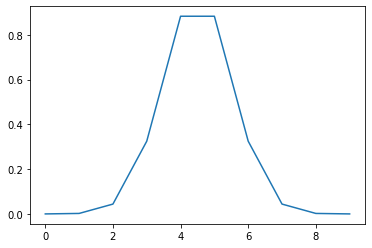

In [13]:
pl.plot(w)

In [14]:
x= np.random.random(100)


In [16]:
y= np.convolve(x,w)
x,w,y

(array([0.31214729, 0.85652835, 0.45863804, 0.56469384, 0.47450369,
        0.91867549, 0.58331282, 0.17552977, 0.3684922 , 0.86667802,
        0.30752495, 0.9281549 , 0.78996334, 0.13320061, 0.68057495,
        0.28368504, 0.37063431, 0.59210284, 0.18924374, 0.86614268,
        0.20062033, 0.45167516, 0.49045189, 0.30489205, 0.92564978,
        0.12394309, 0.30891038, 0.36653225, 0.54334579, 0.83773908,
        0.40456237, 0.37058952, 0.78667685, 0.97625167, 0.09182183,
        0.83157898, 0.49359956, 0.06122639, 0.09302203, 0.09900376,
        0.23953764, 0.83336507, 0.90438772, 0.20050553, 0.26658882,
        0.35348641, 0.71462707, 0.80177599, 0.12713898, 0.92360433,
        0.54137257, 0.69558422, 0.628759  , 0.91034778, 0.69503422,
        0.51876901, 0.92215034, 0.45135795, 0.15290804, 0.80855588,
        0.11944918, 0.27148014, 0.48788878, 0.45615223, 0.14638236,
        0.98157948, 0.48799768, 0.86157333, 0.60135488, 0.40865713,
        0.72829489, 0.60344339, 0.87381095, 0.69

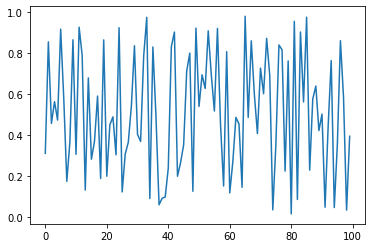

In [18]:
pl.plot(x)

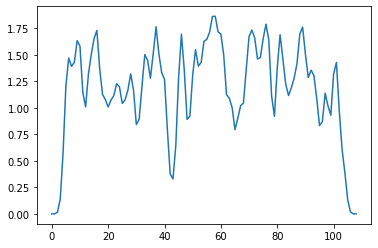

In [19]:
pl.plot(y)

901.5999999999999